Mejores parámetros: {'C': 1000, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
Modelo exportado exitosamente.
MAE: 47.20804623274524
RMSE: 58.43741446181272
MAPE: 12.357889375385342%
Accuracy: 87.64211062461466%
Órdenes predichas para 2024-07-01: 213.44333546066184


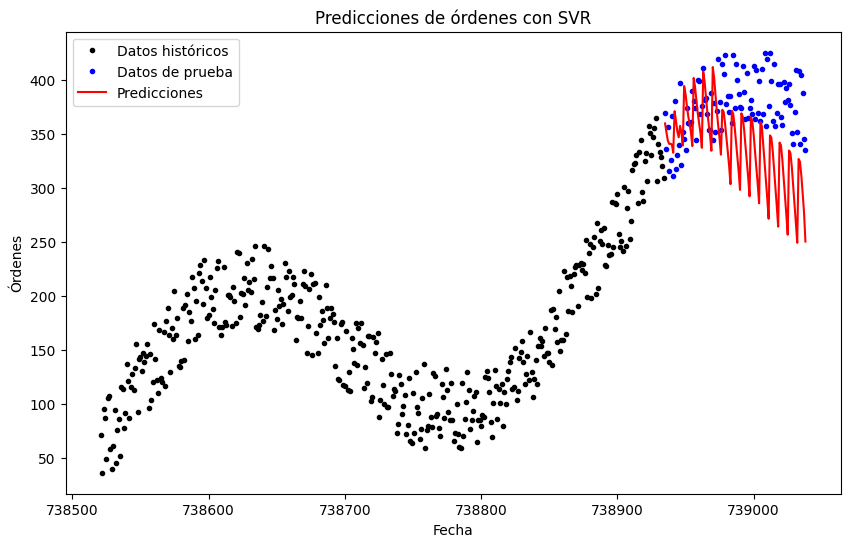

['scaler_87.pkl']

In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt
import joblib

def create_features(df):
    """
    Crea características adicionales basadas en la fecha.
    """
    df['day_of_week'] = df['ds'].dt.dayofweek
    df['month'] = df['ds'].dt.month
    df['quarter'] = df['ds'].dt.quarter
    df['day_of_year'] = df['ds'].dt.dayofyear
    df['week_of_year'] = df['ds'].dt.isocalendar().week
    return df

def scale_features(X_train, X_test):
    """
    Escala las características utilizando StandardScaler.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

def plot_results(X_train, y_train, X_test, y_test, y_pred):
    """
    Genera un gráfico comparativo entre los datos reales y las predicciones.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(X_train['ds'], y_train, 'ko', markersize=3, label='Datos históricos')
    plt.plot(X_test['ds'], y_test, 'bo', markersize=3, label='Datos de prueba')
    plt.plot(X_test['ds'], y_pred, 'r-', label='Predicciones')
    plt.xlabel('Fecha')
    plt.ylabel('Órdenes')
    plt.title('Predicciones de órdenes con SVR')
    plt.legend()
    plt.show()

# Generar fechas
start_date = '2023-01-01'
end_date = '2024-06-01'
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Generar órdenes aleatorias con una tendencia lineal y estacionalidad
np.random.seed(42)
orders = np.random.randint(20, 100, size=len(dates)) + np.arange(len(dates)) * 0.5 + np.sin(np.arange(len(dates)) * 2 * np.pi / 365) * 100

# Crear DataFrame
df = pd.DataFrame({'ds': dates, 'y': orders})
df = create_features(df)

# Convertir fechas a ordinales
df['ds'] = pd.to_datetime(df['ds']).map(pd.Timestamp.toordinal)

# Preparar los datos para el entrenamiento
X = df[['ds', 'day_of_week', 'month', 'quarter', 'day_of_year', 'week_of_year']]
y = df['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Escalar las características
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

# Ajuste de hiperparámetros usando GridSearchCV con TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Exportar el modelo entrenado y el escalador
joblib.dump(best_model, 'modelo_svr_god_2.pkl')
joblib.dump(scaler, 'scaler_god_2.pkl')

print("Modelo exportado exitosamente.")

# Realizar predicciones
y_pred = best_model.predict(X_test_scaled)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"Accuracy: {accuracy}%")

# Predicción para una fecha específica
specific_date = '2024-07-01'

# Convertir la fecha a datetime antes de crear las características
specific_features = pd.DataFrame({
    'ds': [pd.to_datetime(specific_date)]
})

# Crear las características adicionales
specific_features = create_features(specific_features)

# Convertir las fechas a ordinales
specific_features['ds'] = specific_features['ds'].map(pd.Timestamp.toordinal)

# Escalar las características
specific_features_scaled = scaler.transform(specific_features)

# Realizar la predicción
predicted_order = best_model.predict(specific_features_scaled)

print(f"Órdenes predichas para {specific_date}: {predicted_order[0]}")

# Visualizar las predicciones
plot_results(X_train, y_train, X_test, y_test, y_pred)

import joblib

# Exportar el modelo entrenado y el escalador
joblib.dump(best_model, 'modelo_87.pkl')
joblib.dump(scaler, 'scaler_87.pkl')

Mejores parámetros: {'C': 1000, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
Modelo exportado exitosamente.
MAE: 46.94230769230769
RMSE: 58.13512112047508
MAPE: 12.28947286867733%
Accuracy: 87.71052713132266%
Órdenes predichas para 2024-07-01: 215


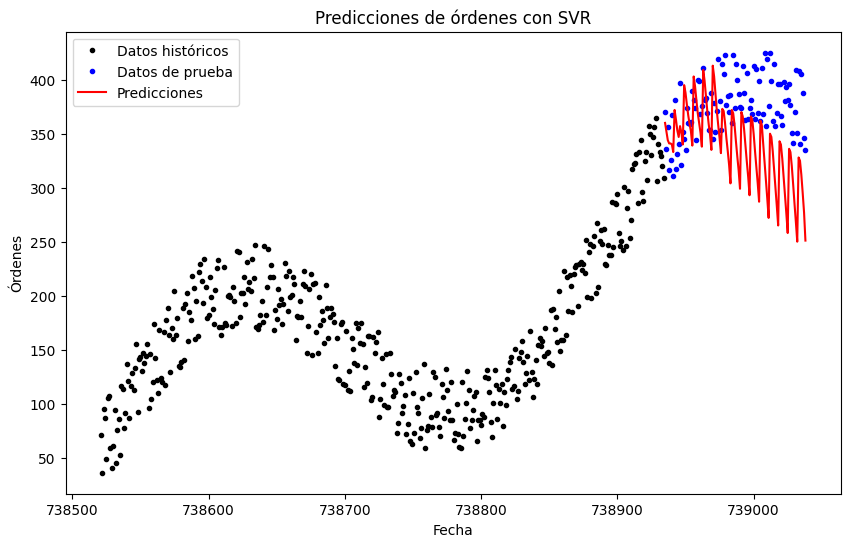

['scaler_87_entero.pkl']

In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt
import joblib

def create_features(df):
    """
    Crea características adicionales basadas en la fecha.
    """
    df['day_of_week'] = df['ds'].dt.dayofweek
    df['month'] = df['ds'].dt.month
    df['quarter'] = df['ds'].dt.quarter
    df['day_of_year'] = df['ds'].dt.dayofyear
    df['week_of_year'] = df['ds'].dt.isocalendar().week
    return df

def scale_features(X_train, X_test):
    """
    Escala las características utilizando StandardScaler.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

def plot_results(X_train, y_train, X_test, y_test, y_pred):
    """
    Genera un gráfico comparativo entre los datos reales y las predicciones.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(X_train['ds'], y_train, 'ko', markersize=3, label='Datos históricos')
    plt.plot(X_test['ds'], y_test, 'bo', markersize=3, label='Datos de prueba')
    plt.plot(X_test['ds'], y_pred, 'r-', label='Predicciones')
    plt.xlabel('Fecha')
    plt.ylabel('Órdenes')
    plt.title('Predicciones de órdenes con SVR')
    plt.legend()
    plt.show()

# Generar fechas
start_date = '2023-01-01'
end_date = '2024-06-01'
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Generar órdenes aleatorias con una tendencia lineal y estacionalidad
np.random.seed(42)
orders = np.random.randint(20, 100, size=len(dates)) + np.arange(len(dates)) * 0.5 + np.sin(np.arange(len(dates)) * 2 * np.pi / 365) * 100

# Asegurarse de que las órdenes sean números enteros
orders = np.round(orders).astype(int)

# Crear DataFrame
df = pd.DataFrame({'ds': dates, 'y': orders})
df = create_features(df)

# Convertir fechas a ordinales
df['ds'] = pd.to_datetime(df['ds']).map(pd.Timestamp.toordinal)

# Preparar los datos para el entrenamiento
X = df[['ds', 'day_of_week', 'month', 'quarter', 'day_of_year', 'week_of_year']]
y = df['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Escalar las características
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

# Ajuste de hiperparámetros usando GridSearchCV con TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Exportar el modelo entrenado y el escalador
joblib.dump(best_model, 'modelo_svr_god_2.pkl')
joblib.dump(scaler, 'scaler_god_2.pkl')

print("Modelo exportado exitosamente.")

# Realizar predicciones
y_pred = best_model.predict(X_test_scaled)

# Asegurarse de que las predicciones sean números enteros
y_pred = np.round(y_pred).astype(int)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"Accuracy: {accuracy}%")

# Predicción para una fecha específica
specific_date = '2024-07-01'

# Convertir la fecha a datetime antes de crear las características
specific_features = pd.DataFrame({
    'ds': [pd.to_datetime(specific_date)]
})

# Crear las características adicionales
specific_features = create_features(specific_features)

# Convertir las fechas a ordinales
specific_features['ds'] = specific_features['ds'].map(pd.Timestamp.toordinal)

# Escalar las características
specific_features_scaled = scaler.transform(specific_features)

# Realizar la predicción
predicted_order = best_model.predict(specific_features_scaled)

# Asegurarse de que la predicción sea un número entero
predicted_order = np.round(predicted_order).astype(int)

print(f"Órdenes predichas para {specific_date}: {predicted_order[0]}")

# Visualizar las predicciones
plot_results(X_train, y_train, X_test, y_test, y_pred)

import joblib

# Exportar el modelo entrenado y el escalador
joblib.dump(best_model, 'modelo_87_entero.pkl')
joblib.dump(scaler, 'scaler_87_entero.pkl')
